Kabupaten Probolinggo dan Sekitarnya; mengulik data PDRB menggunakann Jupyter Notebook

Untuk menilai performa ekonomi suatu daerah, Produk Domestik Regional Bruto (PDRB) bisa menjadi acuan. Data PDRB juga memungkinkan kita untuk melihat keragaman struktur ekonomi suatu daerah. 

Kita akan memanfaatkan data PDRB atas harga konstan 2010 yang bersumber dari Badan Pusat Statistik (BPS). penggunaan harga konstan 2010 memastikan bahwa perhitungan tidak terdistorsi oleh inflasi, sehingga memberikan gambaran riil dinamika ekonomi dari tahun ke tahun. Data yang digunakan mencakup periode 2013-2024 dan meliputi seluruh Kabupaten dan Kota di Jawa Timur.

Dalam analisa ini kita akan menggunakan Jupyter Notebook. kenapa Jupyter Notebook?


In [190]:
# Import library yang dibutuhkan untuk analisa data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Baca data dalam file excel
file_path = r'D:\git\pdrb\PDRB Harga Konstan 2010 Per Kab Jatim1.xlsx'

# Skip baris pertama yang merupakan judul
df_fixed = pd.read_excel(file_path, skiprows=1)

# Mengganti nama kolom
df_fixed.columns = ["Kabupaten/Kota"] + list(range(2014, 2024))

# Menghapus baris yang tidak relevan 
df_fixed = df_fixed.dropna(subset=["Kabupaten/Kota"])

# Menampilkan 5 baris pertama untuk memastikan data sudah benar
df_fixed.head()

,Kabupaten/Kota,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Pacitan,8582.20,9019.54,9489.69,9962.50,10507.37,11040.77,10837.87,11107.40,11722.44,12244.97
1,Ponorogo,11104.54,11687.87,12305.65,12933.45,13615.23,14297.10,14168.62,14619.97,15093.71,15870.05
2,Trenggalek,9998.53,10501.58,11026.55,11579.86,12161.86,12779.45,12502.39,12959.02,13545.41,14212.06
3,Tulungagung,21265.19,22326.63,23446.44,24637.36,25920.20,27299.80,26455.76,27390.42,28818.91,30234.61
4,Blitar,19920.16,20928.47,21991.43,23107.48,24286.24,25530.11,24945.46,25700.02,27037.33,28239.86


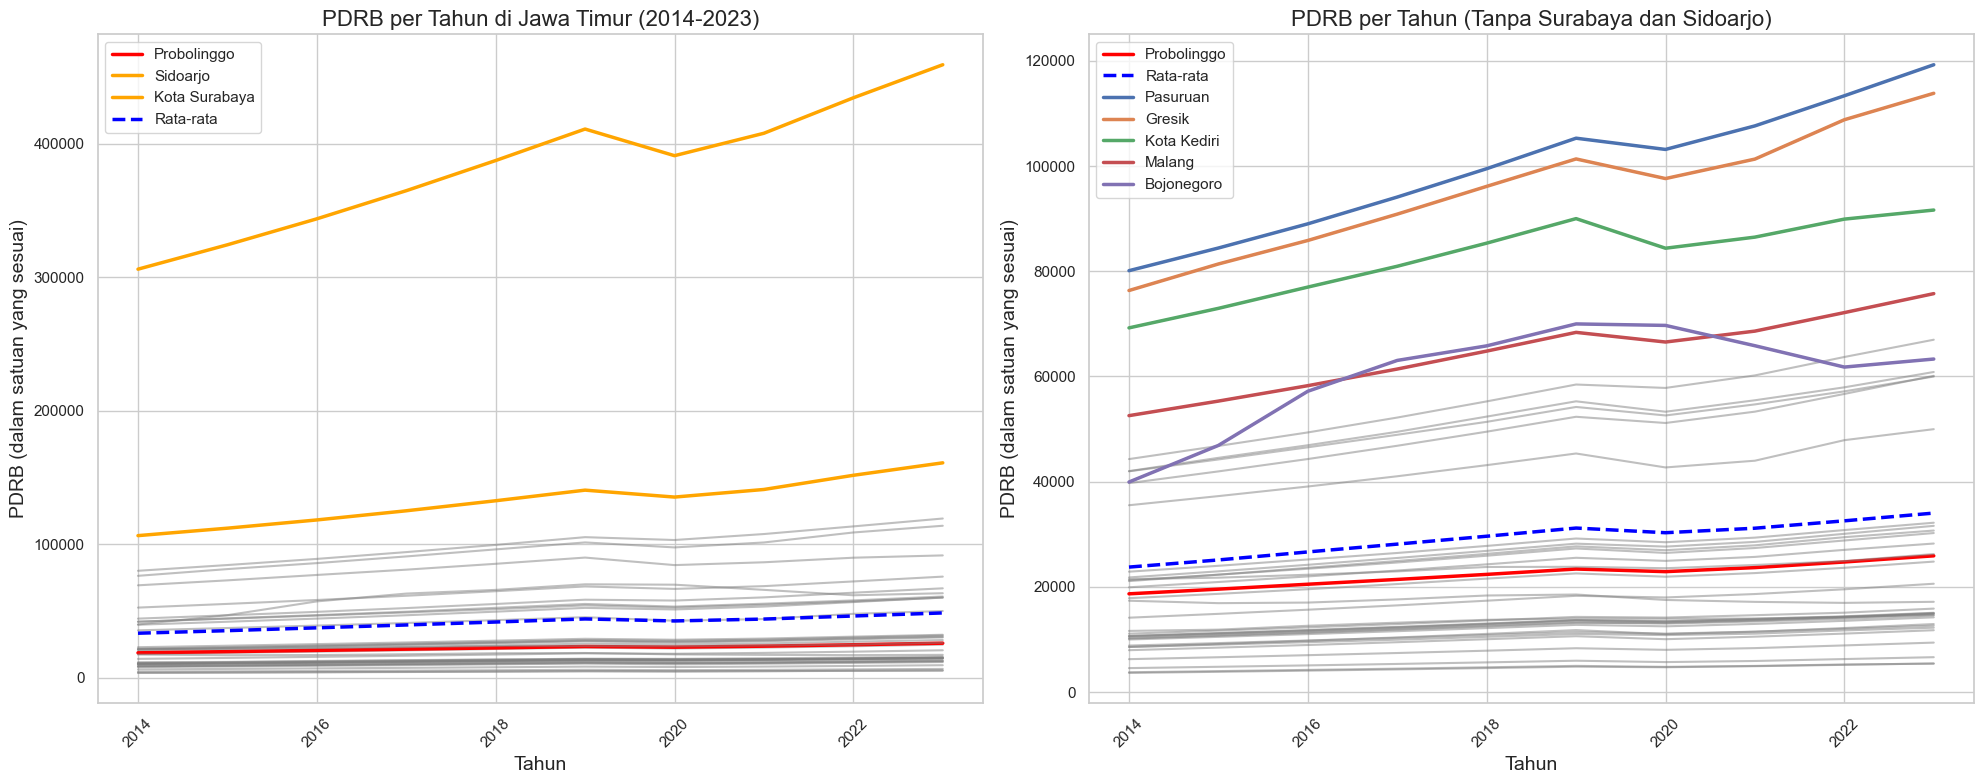

In [191]:
# Mengatur style untuk seaborn
sns.set(style="whitegrid")

# Membuat figure dan axis untuk 2 plot bersandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Fungsi untuk menghitung rata-rata tanpa Surabaya dan Sidoarjo
def calculate_mean_without_outliers(data):
    return data[~data["Kabupaten/Kota"].isin(["Kota Surabaya", "Sidoarjo"])].iloc[:, 1:].mean()

# Fungsi untuk membuat plot
def create_plot(ax, data, title, highlight_outliers=False, highlight_top_4=False):
    # Filter data jika perlu menghilangkan Surabaya dan Sidoarjo
    if not highlight_outliers:
        data = data[~data["Kabupaten/Kota"].isin(["Kota Surabaya", "Sidoarjo"])]

    # Plot semua Kabupaten/Kota
    for idx, row in data.iterrows():
        if row["Kabupaten/Kota"] == "Probolinggo":
            # Memberi penekanan pada Kabupaten Probolinggo
            ax.plot(row.index[1:], row.values[1:], color='red', linewidth=2.5, label='Probolinggo')
        elif highlight_outliers and row["Kabupaten/Kota"] in ["Kota Surabaya", "Sidoarjo"]:
            # Memberi penekanan pada outlier (Surabaya dan Sidoarjo)
            ax.plot(row.index[1:], row.values[1:], color='orange', linewidth=2.5, label=row["Kabupaten/Kota"])
        else:
            # Plot Kabupaten/Kota lainnya
            ax.plot(row.index[1:], row.values[1:], color='grey', alpha=0.5)

    # Menghitung dan plot rata-rata per tahun
    if highlight_outliers:
        mean_values = data.iloc[:, 1:].mean()  # Rata-rata dengan outlier
    else:
        mean_values = calculate_mean_without_outliers(data)  # Rata-rata tanpa outlier
    ax.plot(mean_values.index, mean_values.values, color='blue', linestyle='--', linewidth=2.5, label='Rata-rata')

    # Jika highlight_top_4, plot 4 Kabupaten/Kota teratas
    if highlight_top_4:
        top_4 = data.set_index("Kabupaten/Kota").mean(axis=1).nlargest(5).index
        for kabupaten in top_4:
            row = data[data["Kabupaten/Kota"] == kabupaten].iloc[0]
            ax.plot(row.index[1:], row.values[1:], linewidth=2.5, label=kabupaten)

    # Menambahkan judul dan label
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tahun', fontsize=14)
    ax.set_ylabel('PDRB (dalam satuan yang sesuai)', fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Plot Kiri: Semua Kabupaten/Kota dengan penekanan pada outlier (Surabaya dan Sidoarjo)
create_plot(ax1, df_fixed, 'PDRB per Tahun di Jawa Timur (2014-2023)', highlight_outliers=True)

# Plot Kanan: Tanpa Surabaya dan Sidoarjo, dengan penekanan pada 4 Kabupaten/Kota teratas
create_plot(ax2, df_fixed, 'PDRB per Tahun (Tanpa Surabaya dan Sidoarjo)', highlight_top_4=True)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [192]:
# Menghitung pertumbuhan PDRB dari 2014 hingga 2023
df_fixed['Pertumbuhan'] = ((df_fixed[2023] - df_fixed[2014]) / df_fixed[2014]) * 100

# Mengurutkan berdasarkan pertumbuhan
df_pertumbuhan = df_fixed.sort_values(by='Pertumbuhan', ascending=False)

# Mengurutkan berdasarkan pertumbuhan
df_pertumbuhan = df_fixed.sort_values(by='Pertumbuhan', ascending=False)

# Menampilkan 5 kabupaten/kota dengan pertumbuhan tertinggi dan terendah
print("5 Kabupaten/Kota dengan Pertumbuhan Tertinggi:")
print(df_pertumbuhan[['Kabupaten/Kota', 'Pertumbuhan']].head(5))
print("\n5 Kabupaten/Kota dengan Pertumbuhan Terendah:")
print(df_pertumbuhan[['Kabupaten/Kota', 'Pertumbuhan']].tail(5))

5 Kabupaten/Kota dengan Pertumbuhan Tertinggi:
   Kabupaten/Kota  Pertumbuhan
21     Bojonegoro    58.535018
31    Kota Malang    51.341156
15      Mojokerto    51.229748
14       Sidoarjo    51.220810
37      Kota Batu    50.891319

5 Kabupaten/Kota dengan Pertumbuhan Terendah:
   Kabupaten/Kota  Pertumbuhan
12    Probolinggo    38.660951
29    Kota Kediri    32.352340
26        Sampang    26.142855
28        Sumenep    22.199857
25      Bangkalan    -1.180421


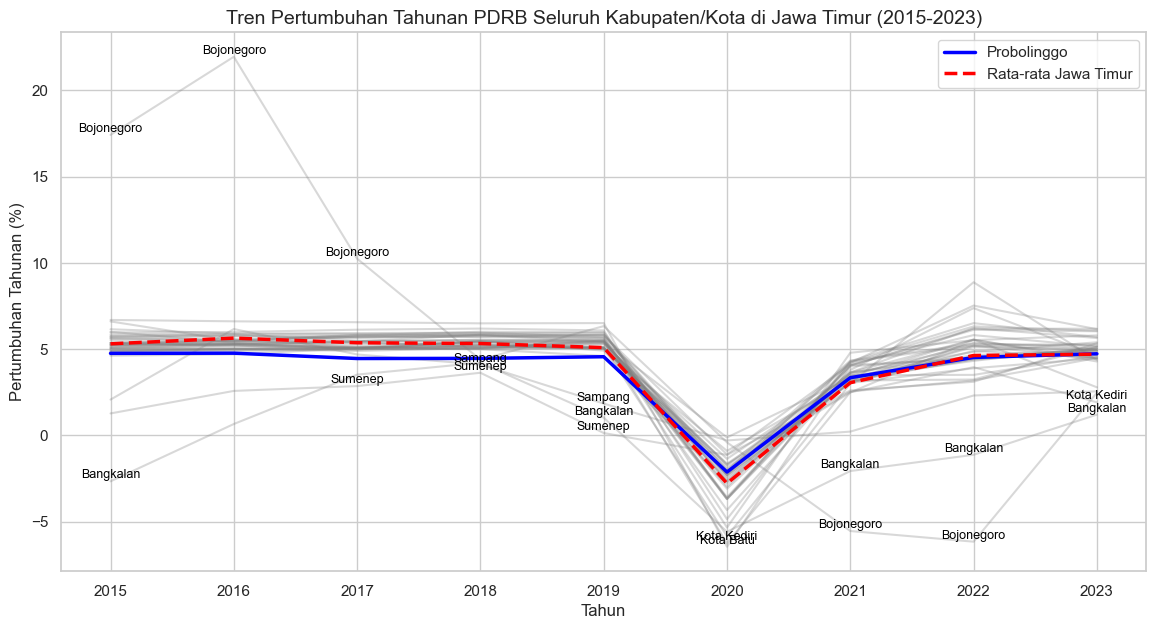

In [194]:
# Menghitung rata-rata dan standar deviasi pertumbuhan tahunan
rata_rata_pertumbuhan_tahunan = df_pertumbuhan_tahunan.iloc[:, :-1].mean()
std_pertumbuhan_tahunan = df_pertumbuhan_tahunan.iloc[:, :-1].std()

# Identifikasi outlier (pertumbuhan > rata-rata + 2*std atau < rata-rata - 2*std)
outlier_kabupaten = []
for kabupaten in df_pertumbuhan_tahunan['Kabupaten/Kota']:
    pertumbuhan_kabupaten = df_pertumbuhan_tahunan[df_pertumbuhan_tahunan['Kabupaten/Kota'] == kabupaten].iloc[:, :-1].values.flatten()
    if any((pertumbuhan_kabupaten > (rata_rata_pertumbuhan_tahunan + 2 * std_pertumbuhan_tahunan)) | 
           (pertumbuhan_kabupaten < (rata_rata_pertumbuhan_tahunan - 2 * std_pertumbuhan_tahunan))):
        outlier_kabupaten.append(kabupaten)

# Plot tren pertumbuhan tahunan seluruh kabupaten/kota
plt.figure(figsize=(14, 7))

# Plot semua kabupaten/kota (warna abu-abu, transparan)
for kabupaten in df_pertumbuhan_tahunan['Kabupaten/Kota']:
    pertumbuhan_kabupaten = df_pertumbuhan_tahunan[df_pertumbuhan_tahunan['Kabupaten/Kota'] == kabupaten].iloc[:, :-1].values.flatten()
    plt.plot(df_pertumbuhan_tahunan.columns[:-1], pertumbuhan_kabupaten, color='gray', alpha=0.3)

# Plot Kabupaten Probolinggo (warna biru, tebal)
probolinggo_growth = df_pertumbuhan_tahunan[df_pertumbuhan_tahunan['Kabupaten/Kota'] == 'Probolinggo'].iloc[:, :-1].values.flatten()
plt.plot(df_pertumbuhan_tahunan.columns[:-1], probolinggo_growth, color='blue', linewidth=2.5, label='Probolinggo')

# Plot rata-rata Jawa Timur (warna merah, garis putus-putus)
plt.plot(df_pertumbuhan_tahunan.columns[:-1], rata_rata_pertumbuhan_tahunan, color='red', linestyle='--', linewidth=2.5, label='Rata-rata Jawa Timur')

# Tambahkan anotasi untuk outlier
for kabupaten in outlier_kabupaten:
    pertumbuhan_kabupaten = df_pertumbuhan_tahunan[df_pertumbuhan_tahunan['Kabupaten/Kota'] == kabupaten].iloc[:, :-1].values.flatten()
    for tahun, pertumbuhan in zip(df_pertumbuhan_tahunan.columns[:-1], pertumbuhan_kabupaten):
        if pertumbuhan > (rata_rata_pertumbuhan_tahunan[tahun] + 2 * std_pertumbuhan_tahunan[tahun]) or \
           pertumbuhan < (rata_rata_pertumbuhan_tahunan[tahun] - 2 * std_pertumbuhan_tahunan[tahun]):
            plt.text(tahun, pertumbuhan, kabupaten, fontsize=9, color='black', ha='center', va='bottom')

# Menambahkan judul dan label
plt.title("Tren Pertumbuhan Tahunan PDRB Seluruh Kabupaten/Kota di Jawa Timur (2015-2023)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Pertumbuhan Tahunan (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [196]:
# Path file
file = r'D:\git\pdrb\PDRB Harga Konstan 2010 Per Lapangan Usaha Kabupaten Probolinggo.xlsx'

# Membaca data dari file Excel
df_sektor = pd.read_excel(file)

# Membersihkan nama sektor
df_sektor['Lapangan Usaha'] = df_sektor['Lapangan Usaha'].str.replace('\n', ' ')  # Ganti newline dengan spasi
df_sektor['Lapangan Usaha'] = df_sektor['Lapangan Usaha'].str.split('/').str[0]  # Ambil bagian sebelum "/"

# Menampilkan beberapa baris pertama setelah pembersihan
print(df_sektor.head())

                         Lapangan Usaha     2015     2016     2017     2018  \
0   Pertanian, Kehutanan, dan Perikanan  7145.07  7358.51  7350.29  7200.14   
1           Pertambangan dan Penggalian   492.95   502.97   522.89   534.97   
2        Industri Pengolahan;Manufaktur  4324.06  4575.88  4940.82  5446.22   
3             Pengadaan Listrik dan Gas   193.82   201.36   210.73   221.04   
4  Penyedian Air dan Pengelolaan Sampah    22.70    23.87    25.21    26.21   

      2019     2020     2021     2022     2023  
0  7278.30  7280.05  7355.14  7510.66  7760.63  
1   533.47   493.40   493.32   508.40   551.55  
2  5887.62  5820.76  6195.45  6525.66  6890.04  
3   232.49   234.17   238.50   252.72   264.69  
4    27.26    28.14    28.42    28.54    29.40  


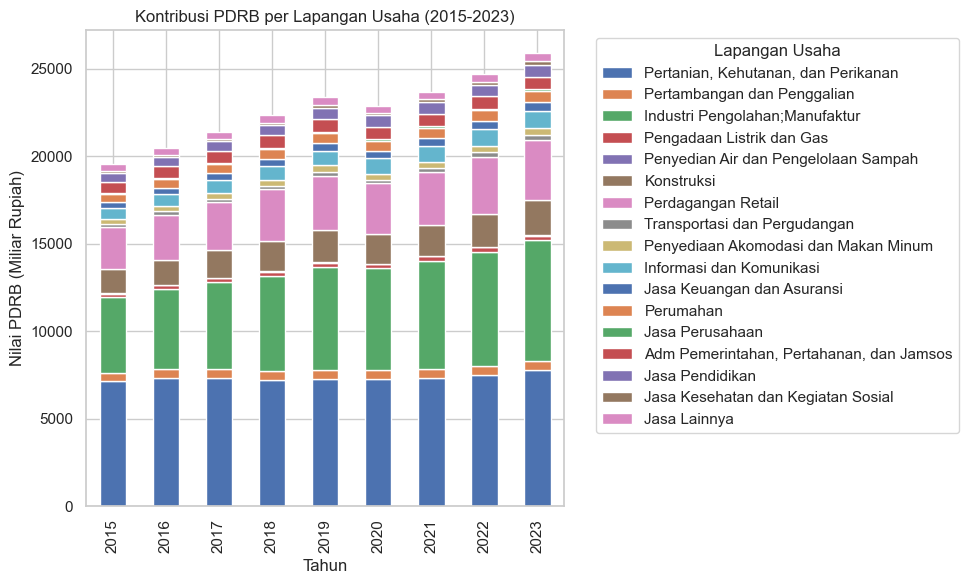

In [197]:
df_sektor.set_index('Lapangan Usaha').T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Kontribusi PDRB per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

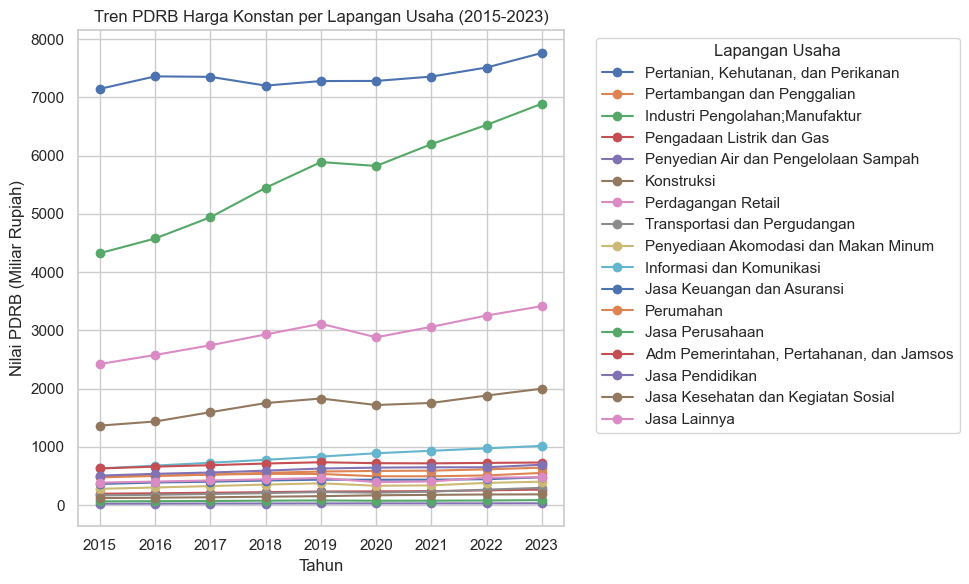

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for index, row in df_sektor.iterrows():
    plt.plot(df_sektor.columns[1:], row[1:], marker='o', label=row['Lapangan Usaha'])
plt.title('Tren PDRB Harga Konstan per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun')  # Sumbu X adalah tahun
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

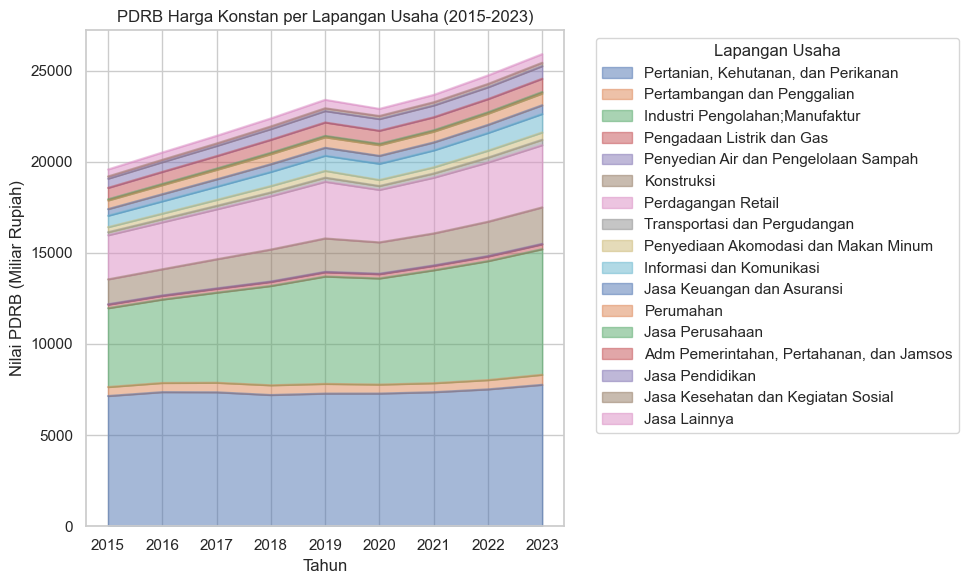

In [199]:
df_sektor.set_index('Lapangan Usaha').T.plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('PDRB Harga Konstan per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

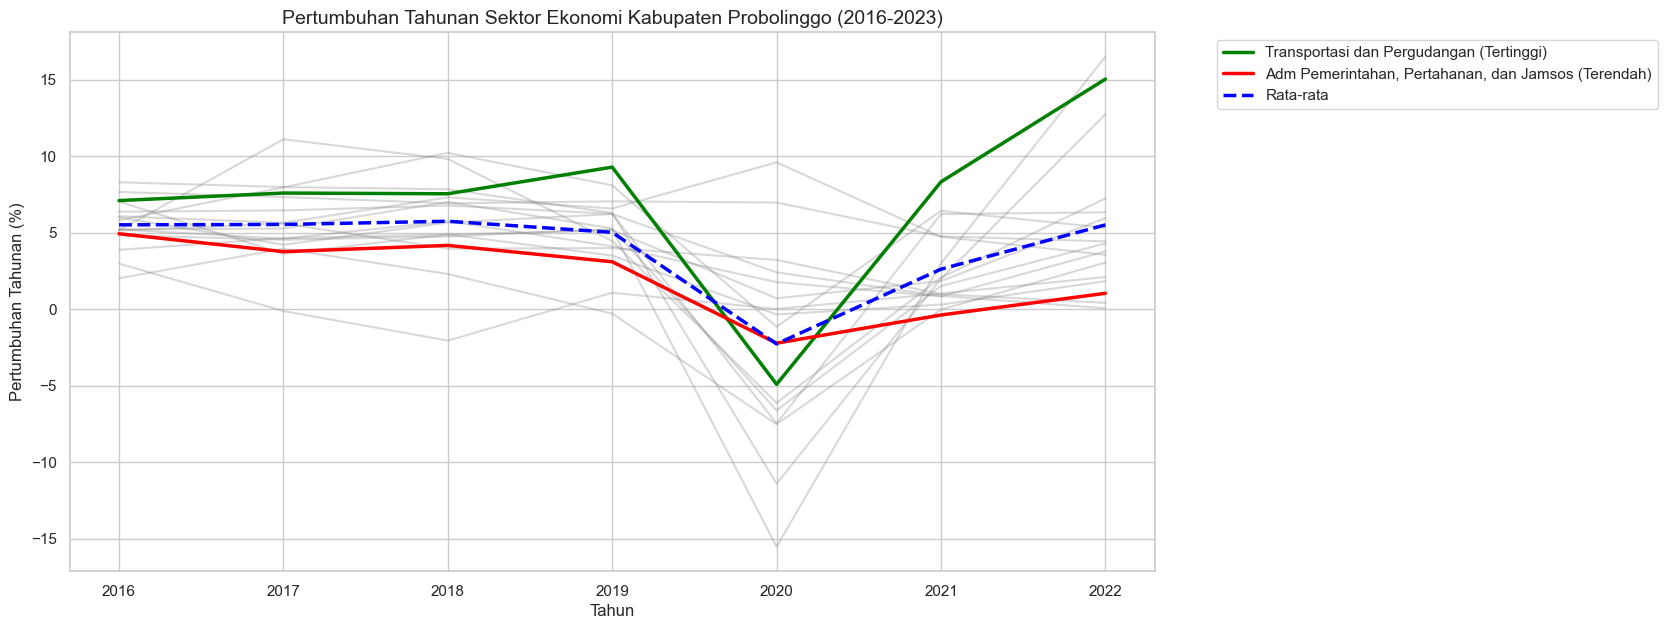

In [203]:
# Menghitung pertumbuhan tahunan setiap sektor
df_pertumbuhan = df_sektor.iloc[:, 1:-1].pct_change(axis='columns') * 100  # Kolom tahun sebagai integer

# Menghitung pertumbuhan tahunan setiap sektor
df_pertumbuhan = df_sektor.iloc[:, 1:-1].pct_change(axis='columns') * 100  # Kolom tahun sebagai integer

# Menambahkan kolom Lapangan Usaha
df_pertumbuhan['Lapangan Usaha'] = df_sektor['Lapangan Usaha']

# Menghitung pertumbuhan 2023
df_sektor['Pertumbuhan 2023 (%)'] = ((df_sektor[2023] - df_sektor[2022]) / df_sektor[2022]) * 100

# Plot pertumbuhan tahunan sektor ekonomi
plt.figure(figsize=(14, 7))

# Plot semua sektor (warna abu-abu, transparan)
for sektor in df_pertumbuhan['Lapangan Usaha']:
    plt.plot(df_pertumbuhan.columns[:-1], df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor].iloc[:, :-1].values.flatten(), color='gray', alpha=0.3)

# Plot sektor dengan pertumbuhan tertinggi (warna hijau, tebal)
sektor_tertinggi = df_sektor.sort_values(by='Pertumbuhan 2023 (%)', ascending=False).iloc[0]['Lapangan Usaha']
pertumbuhan_tertinggi = df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor_tertinggi].iloc[:, :-1].values.flatten()
plt.plot(df_pertumbuhan.columns[:-1], pertumbuhan_tertinggi, color='green', linewidth=2.5, label=f'{sektor_tertinggi} (Tertinggi)')

# Plot sektor dengan pertumbuhan terendah (warna merah, tebal)
sektor_terendah = df_sektor.sort_values(by='Pertumbuhan 2023 (%)').iloc[0]['Lapangan Usaha']
pertumbuhan_terendah = df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor_terendah].iloc[:, :-1].values.flatten()
plt.plot(df_pertumbuhan.columns[:-1], pertumbuhan_terendah, color='red', linewidth=2.5, label=f'{sektor_terendah} (Terendah)')

# Plot rata-rata pertumbuhan Jawa Timur (warna biru, garis putus-putus)
rata_rata_pertumbuhan = df_pertumbuhan.iloc[:, :-1].mean()
plt.plot(df_pertumbuhan.columns[:-1], rata_rata_pertumbuhan, color='blue', linestyle='--', linewidth=2.5, label='Rata-rata')

# Menambahkan judul dan label
plt.title("Pertumbuhan Tahunan Sektor Ekonomi Kabupaten Probolinggo (2016-2023)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Pertumbuhan Tahunan (%)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Menampilkan plot
plt.show()